In [1]:
# author: Fahim Tajwar

from label_loader import *
from image_loader import *
from util import *
from models import *
from model_trainer import *
from dataset import *

In [2]:
file_name_1 = '../data/labels_cells_only.xlsx'
file_name_2 = '../data/classes_800.xlsx'
file_names = [file_name_1, file_name_2]

label_reader = Label_Reader(file_names)
weight_vector = label_reader.get_weight_vector()
print(label_reader.get_all_labels())
print(label_reader.get_label_to_label_id_map())
print(weight_vector)

set(['cell dies', 'grows dense', 'grows sparse'])
{'cell dies': 0, 'grows dense': 1, 'grows sparse': 2}
tensor([0.0260, 0.0294, 0.0097])


In [3]:
num_classes = len(label_reader.get_all_labels())
print("Number of classes : ",  num_classes)

('Number of classes : ', 3)


In [4]:
prefix = "../data/well2_data/well"
suffix = "_well.png"

all_well_ids = label_reader.get_all_well_ids()
ti = TimeCourse_Image_Loader(1, 5, all_well_ids, prefix, suffix)
tensor = ti.get_image_tensor()
well_id_to_image_id_map = ti.get_well_to_image_id_map()
print(tensor.shape)
print(well_id_to_image_id_map)

torch.Size([351, 3, 5, 224, 224])
{14: 243, 17: 248, 29: 265, 2082: 146, 42: 292, 2091: 147, 2094: 148, 2096: 149, 2099: 150, 52: 304, 2101: 151, 54: 308, 2107: 152, 62: 323, 2111: 153, 2114: 154, 67: 328, 68: 330, 2122: 155, 75: 341, 2124: 156, 2134: 157, 2135: 158, 2137: 159, 91: 348, 96: 349, 98: 350, 2147: 160, 100: 236, 101: 237, 111: 238, 360: 278, 2164: 161, 121: 239, 2751: 213, 128: 240, 2179: 162, 134: 241, 136: 242, 2193: 163, 2194: 164, 2199: 165, 153: 244, 159: 245, 2210: 166, 2215: 167, 169: 247, 2227: 168, 2228: 169, 183: 249, 187: 250, 2239: 171, 197: 251, 2249: 172, 202: 253, 2253: 173, 206: 254, 221: 255, 2278: 174, 2285: 175, 242: 256, 2291: 176, 250: 257, 2299: 177, 255: 258, 257: 259, 269: 260, 272: 261, 275: 262, 278: 263, 286: 264, 2337: 178, 292: 266, 2342: 179, 295: 267, 2344: 180, 2346: 181, 2351: 182, 307: 268, 2360: 183, 2361: 184, 317: 269, 2368: 185, 321: 270, 325: 271, 326: 272, 329: 273, 331: 274, 2387: 186, 2388: 187, 2389: 188, 2393: 189, 347: 275, 2397

In [5]:
input_size = 3 * 224 * 224 * 5
num_classes = 3

label_to_label_id = label_reader.label_to_label_id
label_id_to_label_map = label_reader.get_label_id_to_label_map()
#print(label_id_to_label_map)

Y_label = label_reader.get_label_map()
for key in Y_label:
    Y_label[key] = label_to_label_id[Y_label[key]]

#print(Y_label)

label_id_train, label_id_val, label_id_test = get_dataset_split(Y_label)
print(len(label_id_train))
print(label_id_train)
print(len(label_id_val))
print(len(label_id_train))

280
[2215 1998 1644  561 1476   54  456 1327   67 1779   42 1432  167   75
 1614  614  358 2881 2839 1098 1607 1791 1018 1337 2414  121   52 1857
 1064 1004  450  517 1719 2017  206 1023 2096 1983 2800  347  355 2406
 2046  677 1134  412 1679  424 2239 2291 2194 2299 2939 2253  381 1233
  767  785 1977  307 1811  739 1569 2543 2082 1859 1141 2847 2955  326
 1480 2278 1863 1786 1934 1130 2227  635 1016  325 2342 1906  221  623
  321 2920 1685 1611  269  667 2397 1194  128 1801 1775  418  317  518
 1672 1037  286 2393 2040 2666 1828  278 2820 1324 2832 2579 1958   14
 2862 1036 1063  101 1689 1600 2210 1667  292 2387  702  451  360 1100
 1389 2360 2137  683 1945 2899 1880 1176 1813  755  464 2569  387  724
 1848  499 1784  136   17 2891 1142 1175  588 2438 1015   29 2032 1833
 1819 2101  590 2693 1785 2408 1838  169 1265  536 2001 1111 1993   96
  391 1804 1125 2684  593 1714 1876 1733 1736  434 2107  371 2091  187
 1806  723 1516  100 2346 1870  750 1153 1078 1962 1812 1974 1815  374
 1

In [6]:
training_set = Dataset(tensor, label_id_train, Y_label, well_id_to_image_id_map)
validation_set = Dataset(tensor, label_id_val, Y_label, well_id_to_image_id_map)
test_set = Dataset(tensor, label_id_test, Y_label, well_id_to_image_id_map)

In [7]:
training_batch_size = 320
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.00001

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

In [8]:
conv_net_3D = Simple3DConvNet()
model = Model(conv_net_3D, training_set, training_batch_size, learning_rate, label_id_to_label_map, 
              weight = weight_vector, imbalanced_class = True, num_epochs = 15, verbose = True)

Epoch: [1/15], Loss: 1.1087
Epoch: [2/15], Loss: 1.0976
Epoch: [3/15], Loss: 1.0889
Epoch: [4/15], Loss: 1.0807
Epoch: [5/15], Loss: 1.0730
Epoch: [6/15], Loss: 1.0656
Epoch: [7/15], Loss: 1.0585
Epoch: [8/15], Loss: 1.0517
Epoch: [9/15], Loss: 1.0451
Epoch: [10/15], Loss: 1.0389
Epoch: [11/15], Loss: 1.0328
Epoch: [12/15], Loss: 1.0270
Epoch: [13/15], Loss: 1.0213
Epoch: [14/15], Loss: 1.0159
Epoch: [15/15], Loss: 1.0106
Training done!


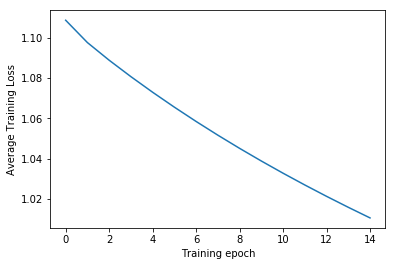

accuracy : 53.000000

('Frequency per class: ', {'cell dies': 68, 'grows dense': 47, 'grows sparse': 165})


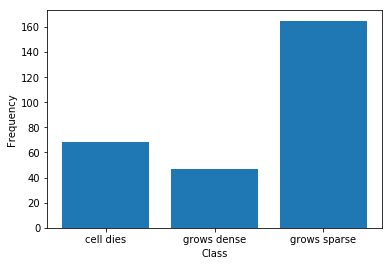

('Number of datapoints we got correct per class', {'cell dies': 50, 'grows dense': 15, 'grows sparse': 84})
('Accuracy per class', {'cell dies': 0.7352941176470589, 'grows dense': 0.3191489361702128, 'grows sparse': 0.509090909090909})


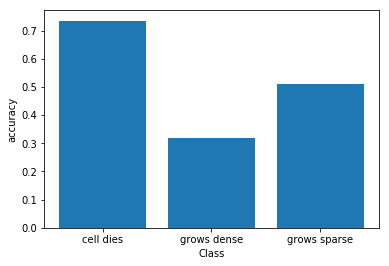

0.11946751621344863

In [9]:
model.train()

accuracy : 62.000000

('Frequency per class: ', {'cell dies': 9, 'grows dense': 8, 'grows sparse': 18})


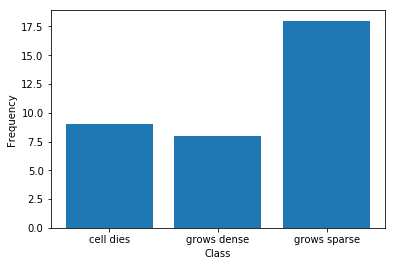

('Number of datapoints we got correct per class', {'cell dies': 9, 'grows dense': 6, 'grows sparse': 7})
('Accuracy per class', {'cell dies': 1.0, 'grows dense': 0.75, 'grows sparse': 0.3888888888888889})


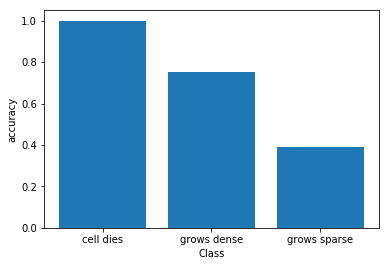

0.2916666666666667

In [10]:
model.test(validation_loader)

accuracy : 54.000000

('Frequency per class: ', {'cell dies': 9, 'grows dense': 9, 'grows sparse': 17})


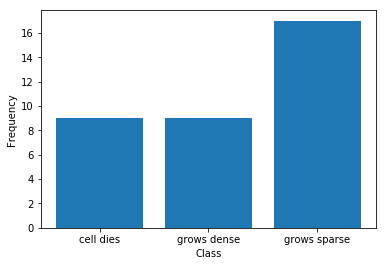

('Number of datapoints we got correct per class', {'cell dies': 7, 'grows dense': 3, 'grows sparse': 9})
('Accuracy per class', {'cell dies': 0.7777777777777778, 'grows dense': 0.3333333333333333, 'grows sparse': 0.5294117647058824})


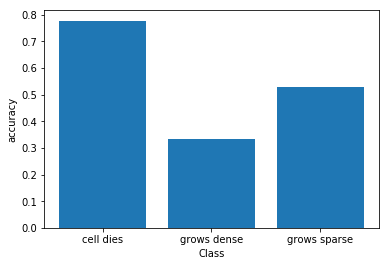

0.1372549019607843

In [11]:
model.test(test_loader)